# Customer Churn Prediction

### 1.0 - Defining the Problem and Dataset

##### 1.1 - Problem

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

##### 1.2 - Variables

customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)


### 2.0 - Importing Data

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data 
df_telco = pd.read_csv('Telco-Customer-Churn.csv')

# Heading
df_telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Tail
df_telco.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# Shape
print("The shape of our Telco data is", df_telco.shape)

The shape of our Telco data is (7043, 21)


In [5]:
# Info
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see in the above, almost all of our variables are categorical variables except Senior citizen (binary), tenure (discrete), and monthly charges (continuous). Before we build our models, we will need to handle the categorical variables once we get into our data cleansing section. 

In [6]:
# Checking for missing values
df_telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In the above, we got lucky to see that there are no missing values in our data set. 

In [7]:
# Checking for any duplicate values in our customer id column 
duplicate_ids = df_telco['customerID'].duplicated()

# Count the number of duplicates
num_duplicates = duplicate_ids.sum()
print(f"Number of duplicate customerID values: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate customerIDs:")
    print(df_telco[duplicate_ids])

Number of duplicate customerID values: 0


There are no duplicate customer ID's in our data set. 

### 3.0 - EDA

### 3.1 - Categorical Features: Churn vs Non-Churn 

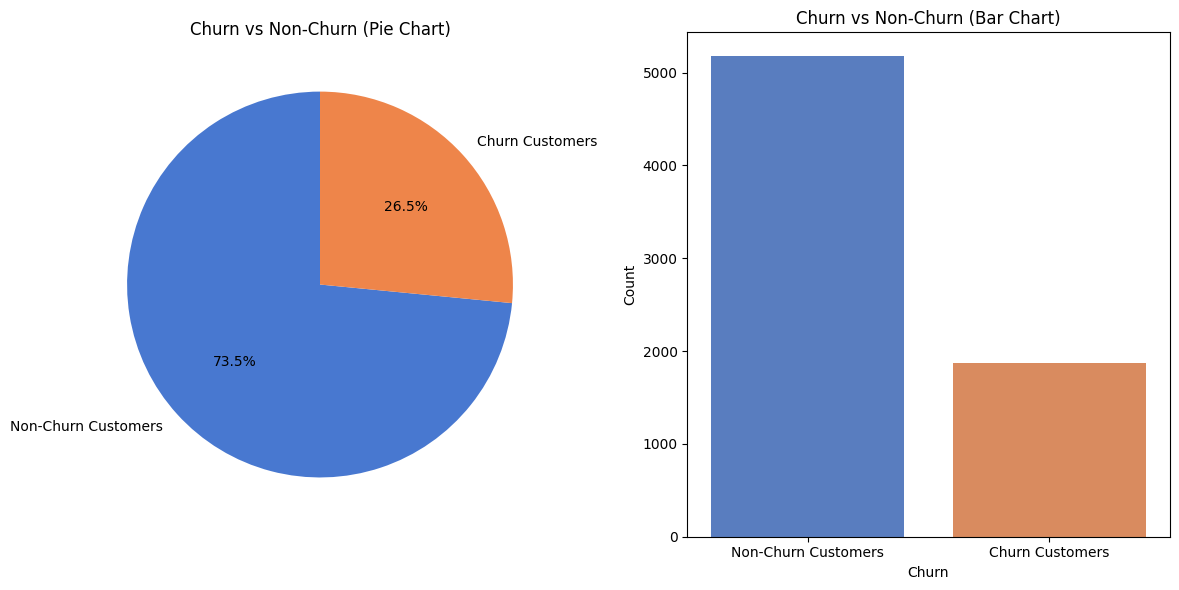

In [8]:
# Churn vs Non-Churn Customers

# Count the number of churn vs non-churn customers
churn_counts = df_telco['Churn'].value_counts()

custom_labels = ['Non-Churn Customers', 'Churn Customers'] 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    churn_counts, 
    labels=custom_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('muted')
)
axes[0].set_title('Churn vs Non-Churn (Pie Chart)')

# Bar chart
sns.barplot(
    x=custom_labels, 
    y=churn_counts.values, 
    ax=axes[1], 
    palette='muted'
)
axes[1].set_title('Churn vs Non-Churn (Bar Chart)')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()



As we can see here, we have significantly more non-churn customers vs churn customers. For every 3 non-churn customers, there is one churn customer. As it is unbalanced, this can lead to some bias towards non-churn customers.

##### 3.1.2 - Customer Information - Gender, Senior Citizen, Partner, Dependents

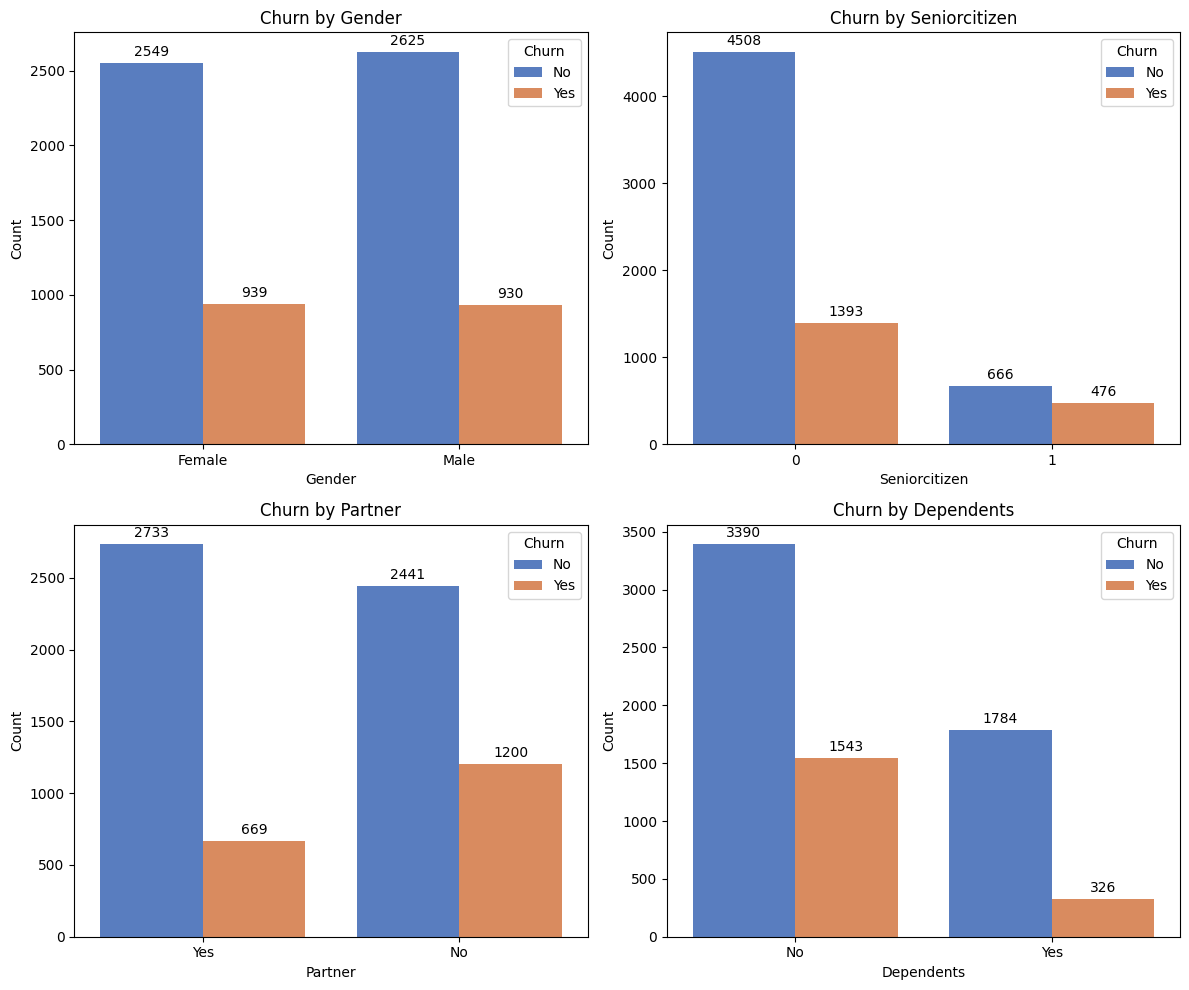

In [9]:
# Define the variables to visualize
variables1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  

# Plot each variable
for i, var in enumerate(variables1):
    ax = axes[i]
    sns.countplot(
        data=df_telco, 
        x=var, 
        hue='Churn', 
        palette='muted', 
        ax=ax
    )
    ax.set_title(f'Churn by {var.capitalize()}')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

    # Annotate counts on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


- **Male vs Female:** both genders are nearly identical

- **Senior Citizen vs Non-Senior Citizen:** The amount of non-senior citizens is much higher than senior citizens. We do, however, see that senior citizens have a significantly higher churn rate (41.7%) compared to non-senior citizens (23.6%)

- **Partner:** Customers who live with a partner churned less than those who do not live with a partner

- **Dependents:** Customers with dependents churned significantly less than those without dependents

##### 3.1.3 - Customer Services - Phone Service, MultipleLines, Internet, TV Streaming, Movie Streaming

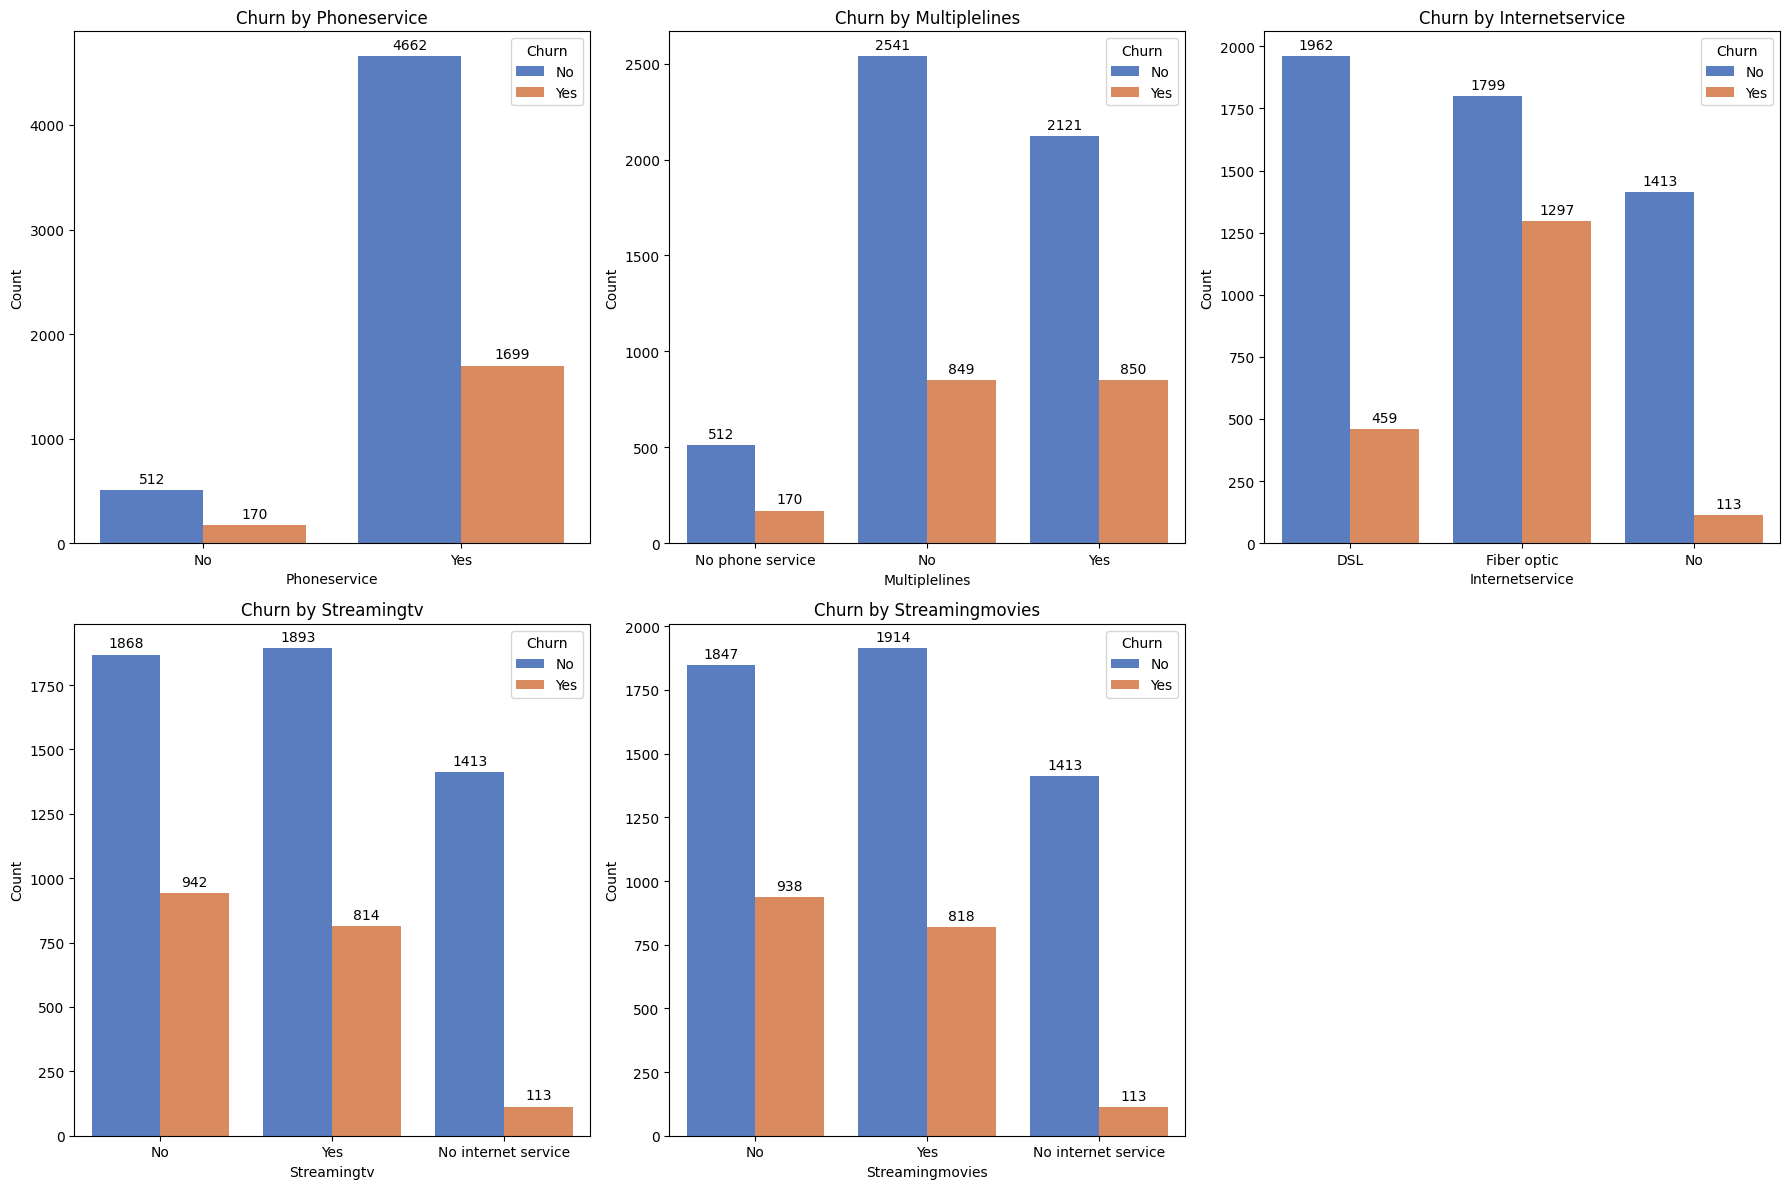

In [10]:
# Define the variables to visualize
variables2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables2):
    ax = axes[i]
    sns.countplot(
        data=df_telco,
        x=var,
        hue='Churn',
        palette='muted',
        ax=ax
    )
    ax.set_title(f'Churn by {var.replace("_", " ").capitalize()}')
    ax.set_xlabel(var.replace("_", " ").capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

    # Annotate counts on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

if len(variables2) < len(axes):
    for j in range(len(variables2), len(axes)):
        axes[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


- **Phone Service:** 90% of customers had a phone service but the rate of churn between yes and no was similar (~24%)

- **Multiple Lines:**: Multiple lines and single lines appear to be very similar

- **Internet Service**: It looks like customers prefer DSL compared to FiberOptic as DSL has much lower churn rate

- **Streaming**: Both streaming TV and Movies appaear to have nearly identical graphs with pretty similar churn rates between having streaming and not having streaming

##### 3.1.4 - Services Subscribed to - Online Security, Online Backup, Device Protection, and Tech Support

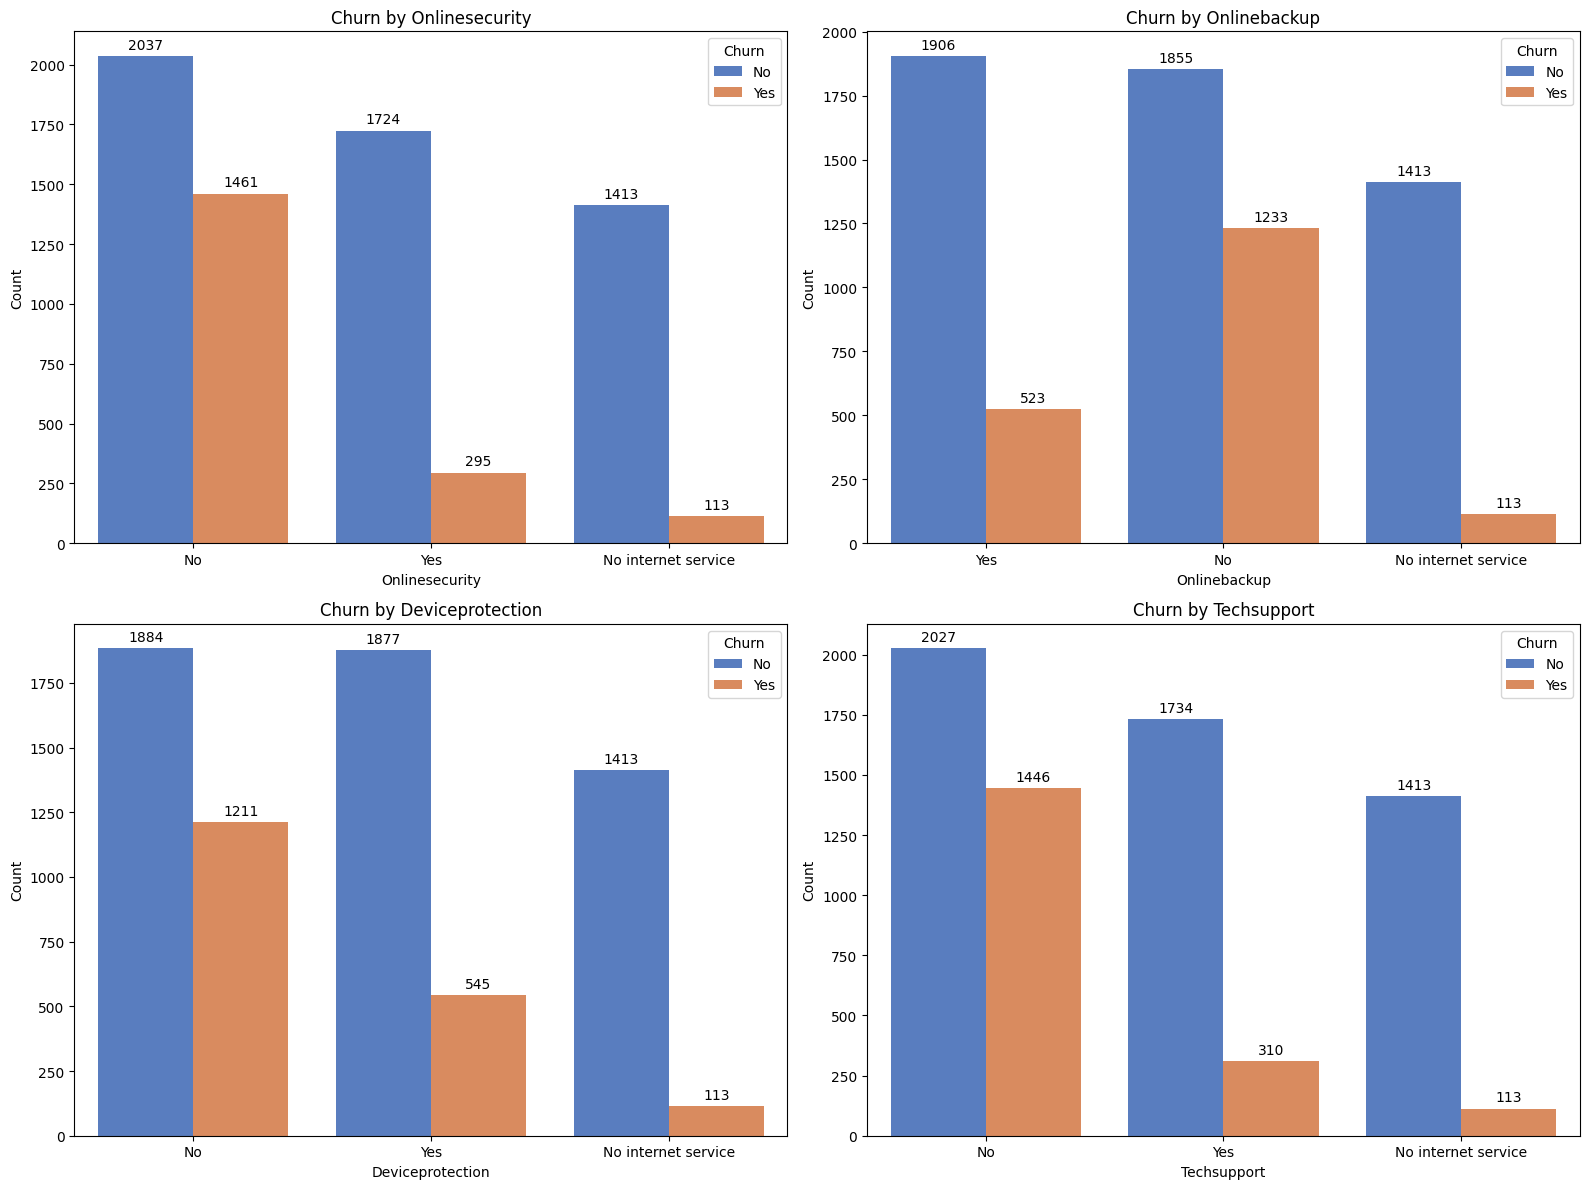

In [11]:
# Define the variables to visualize
variables3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables3):
    ax = axes[i]
    sns.countplot(
        data=df_telco,
        x=var,
        hue='Churn',
        palette='muted',
        ax=ax
    )
    ax.set_title(f'Churn by {var.replace("_", " ").capitalize()}')
    ax.set_xlabel(var.replace("_", " ").capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

    # Annotate counts on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



- **Online Security, Backup, Device Protection, and Tech Support:** All of the above variables have a common theme. Customers that were not subscribed to these services had a much higher churn rate and were more likely to switch providers. 

##### 3.1.5 - Finances - Contract , Paperless Billing, Payment Method

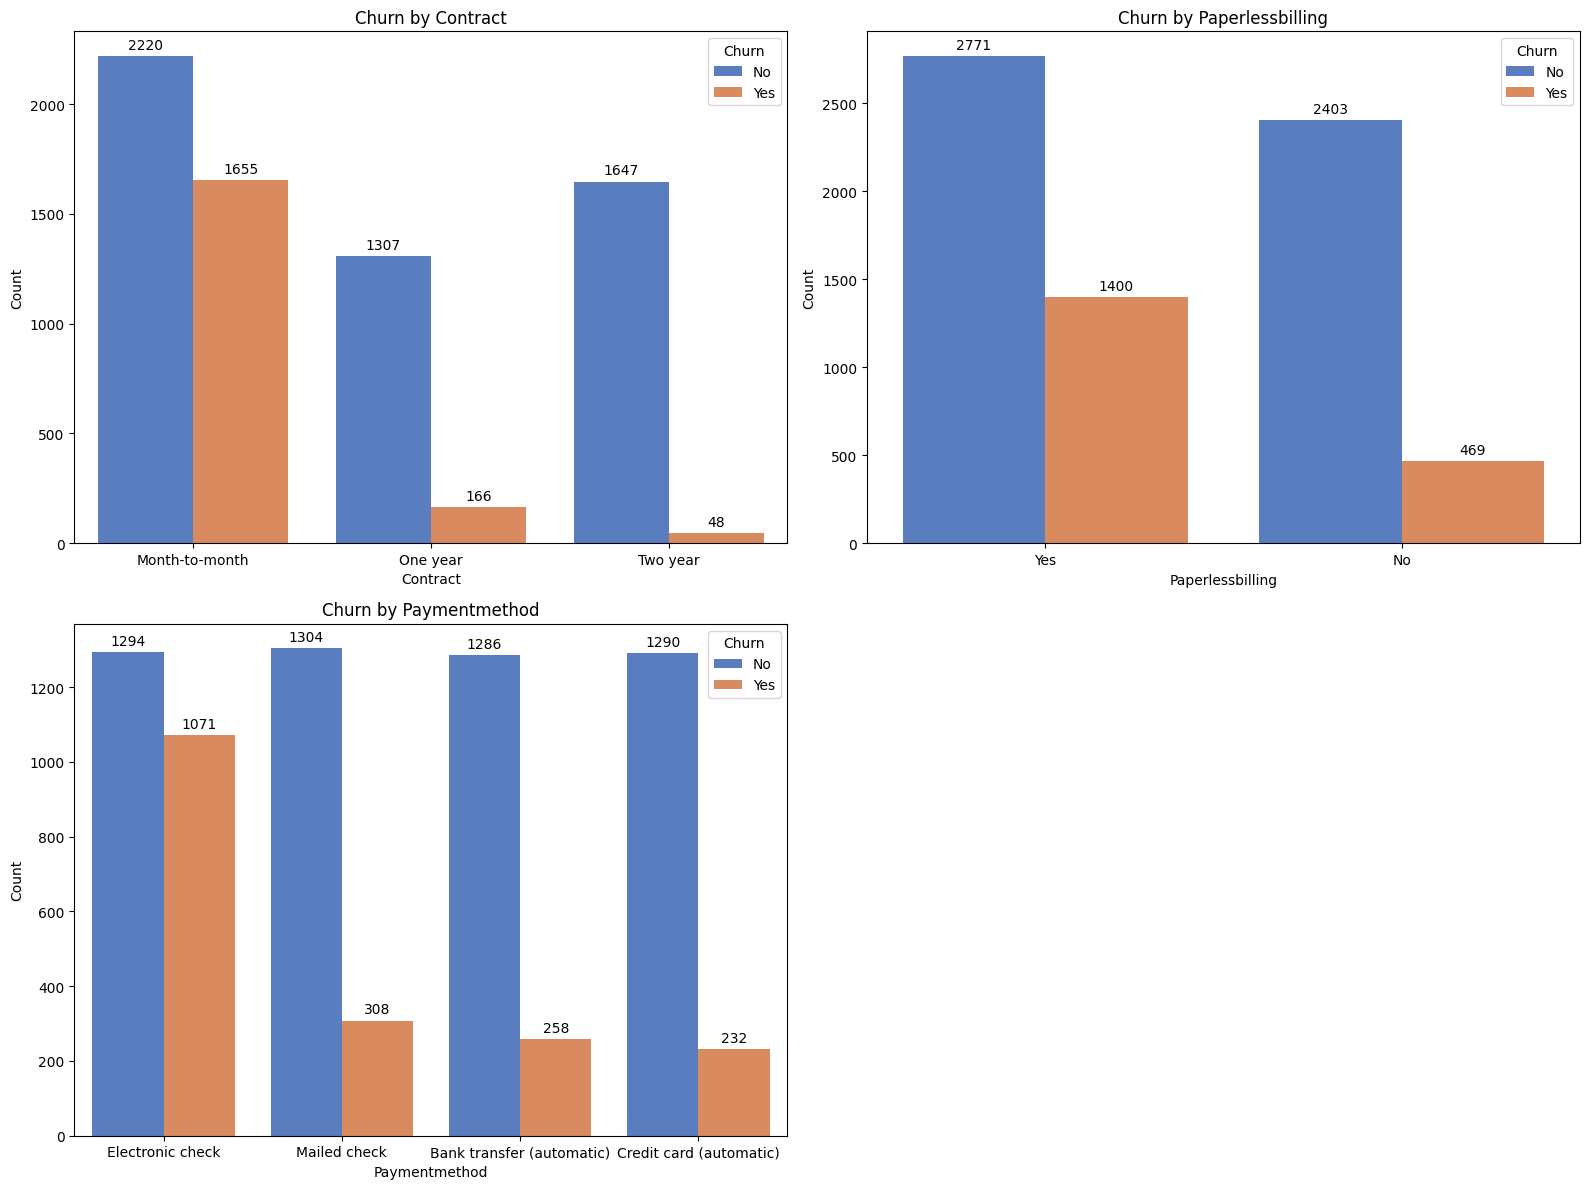

In [12]:
# Define the variables to visualize
variables4 = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables4):
    ax = axes[i]
    sns.countplot(
        data=df_telco,
        x=var,
        hue='Churn',
        palette='muted',
        ax=ax
    )
    ax.set_title(f'Churn by {var.replace("_", " ").capitalize()}')
    ax.set_xlabel(var.replace("_", " ").capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

    # Annotate counts on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

# Turn off the unused subplot
if len(variables4) < len(axes):
    for j in range(len(variables4), len(axes)):
        axes[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



- **Contract:** When evaluating customer contracts, we see that those under a Month-to-Month contract have a much higher churn rate compared to those in a one or two year contract. This can likely be explained by customers trying out new service providers compared to those who enjoy Telco's service and are willing to commit to longer contracts. 

- **Paperless Billing:** Those with paperless have a much higher rate of being churned out

- **Payment Method** Electronic checks had by far the most customers being churned out. This might tell us we have a faulty e-check system



### 3.2 - Categorical Features when Churn is positive

##### 3.2.1 - Customer Information - Gender, Senior Citizen, Partner, Dependents

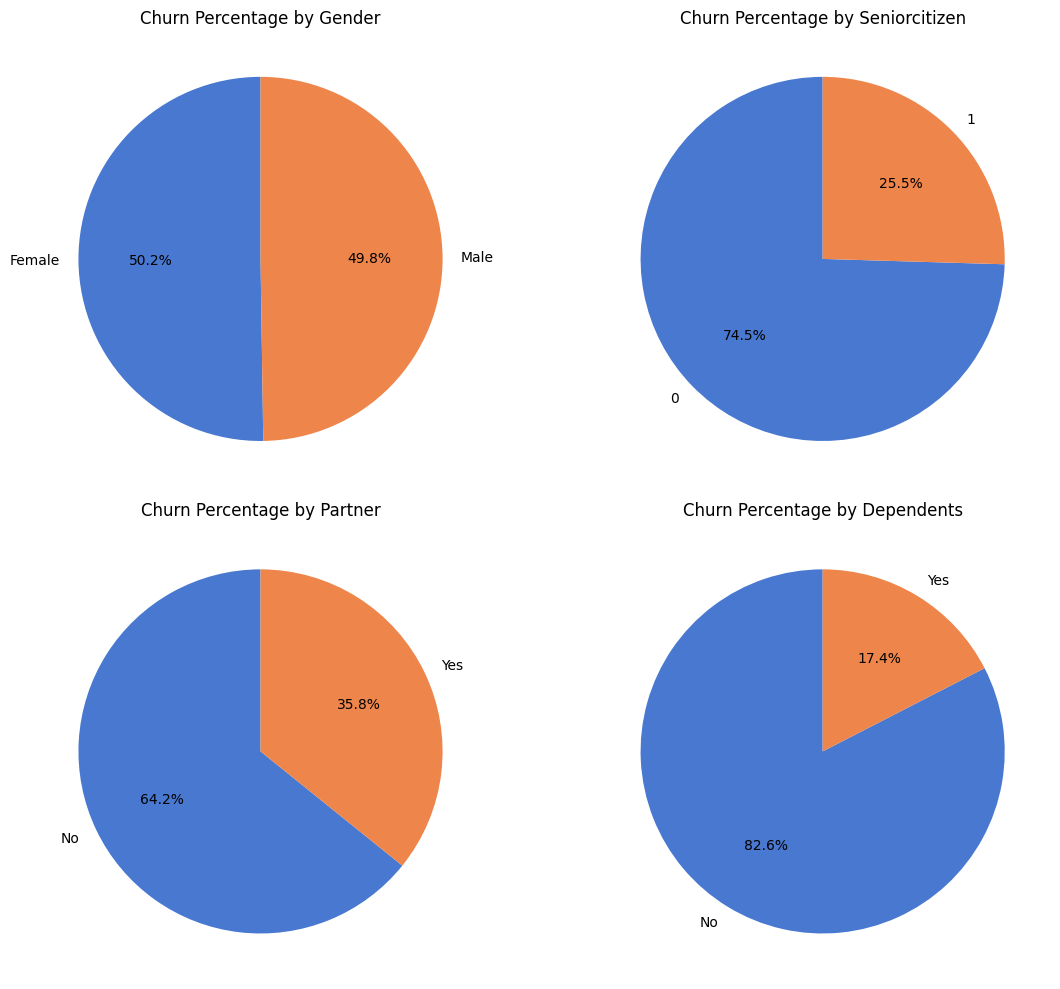

In [13]:
# Create a 2x2 grid for pie charts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Generate pie charts for each variable
for i, var in enumerate(variables1):
    ax = axes[i]
    churn_data = df_telco[df_telco['Churn'] == 'Yes'][var].value_counts(normalize=True) * 100
    non_churn_data = df_telco[df_telco['Churn'] == 'No'][var].value_counts(normalize=True) * 100
    
    # Combine churn and non-churn percentages
    combined_data = pd.concat(
        [churn_data.rename("Churn"), non_churn_data.rename("Non-Churn")],
        axis=1
    ).fillna(0)
    
    # Prepare pie chart values
    labels = combined_data.index
    sizes_churn = combined_data["Churn"]
    sizes_non_churn = combined_data["Non-Churn"]
    
    # Pie chart for churn
    ax.pie(
        sizes_churn,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("muted", len(labels))
    )
    ax.set_title(f'Churn Percentage by {var.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()


In the above, we examine our customer information variables where our target variable (churn) is positive. 

- **Gender:** Gender appears to be pretty much be 50/50

- **Senior Citizen:** About 75% of churned customers are not senior citizens

- **Partner:** 64% of customers who switch providers do not have a partners

- **Dependents:** 82% are customers do not have dependents. Between this and having a partner, it appears that 73.4% of customers who churned out were living by themselves. 

##### 3.2.2 - Customer Services - Phone Service, MultipleLines, Internet, TV Streaming, Movie Streaming

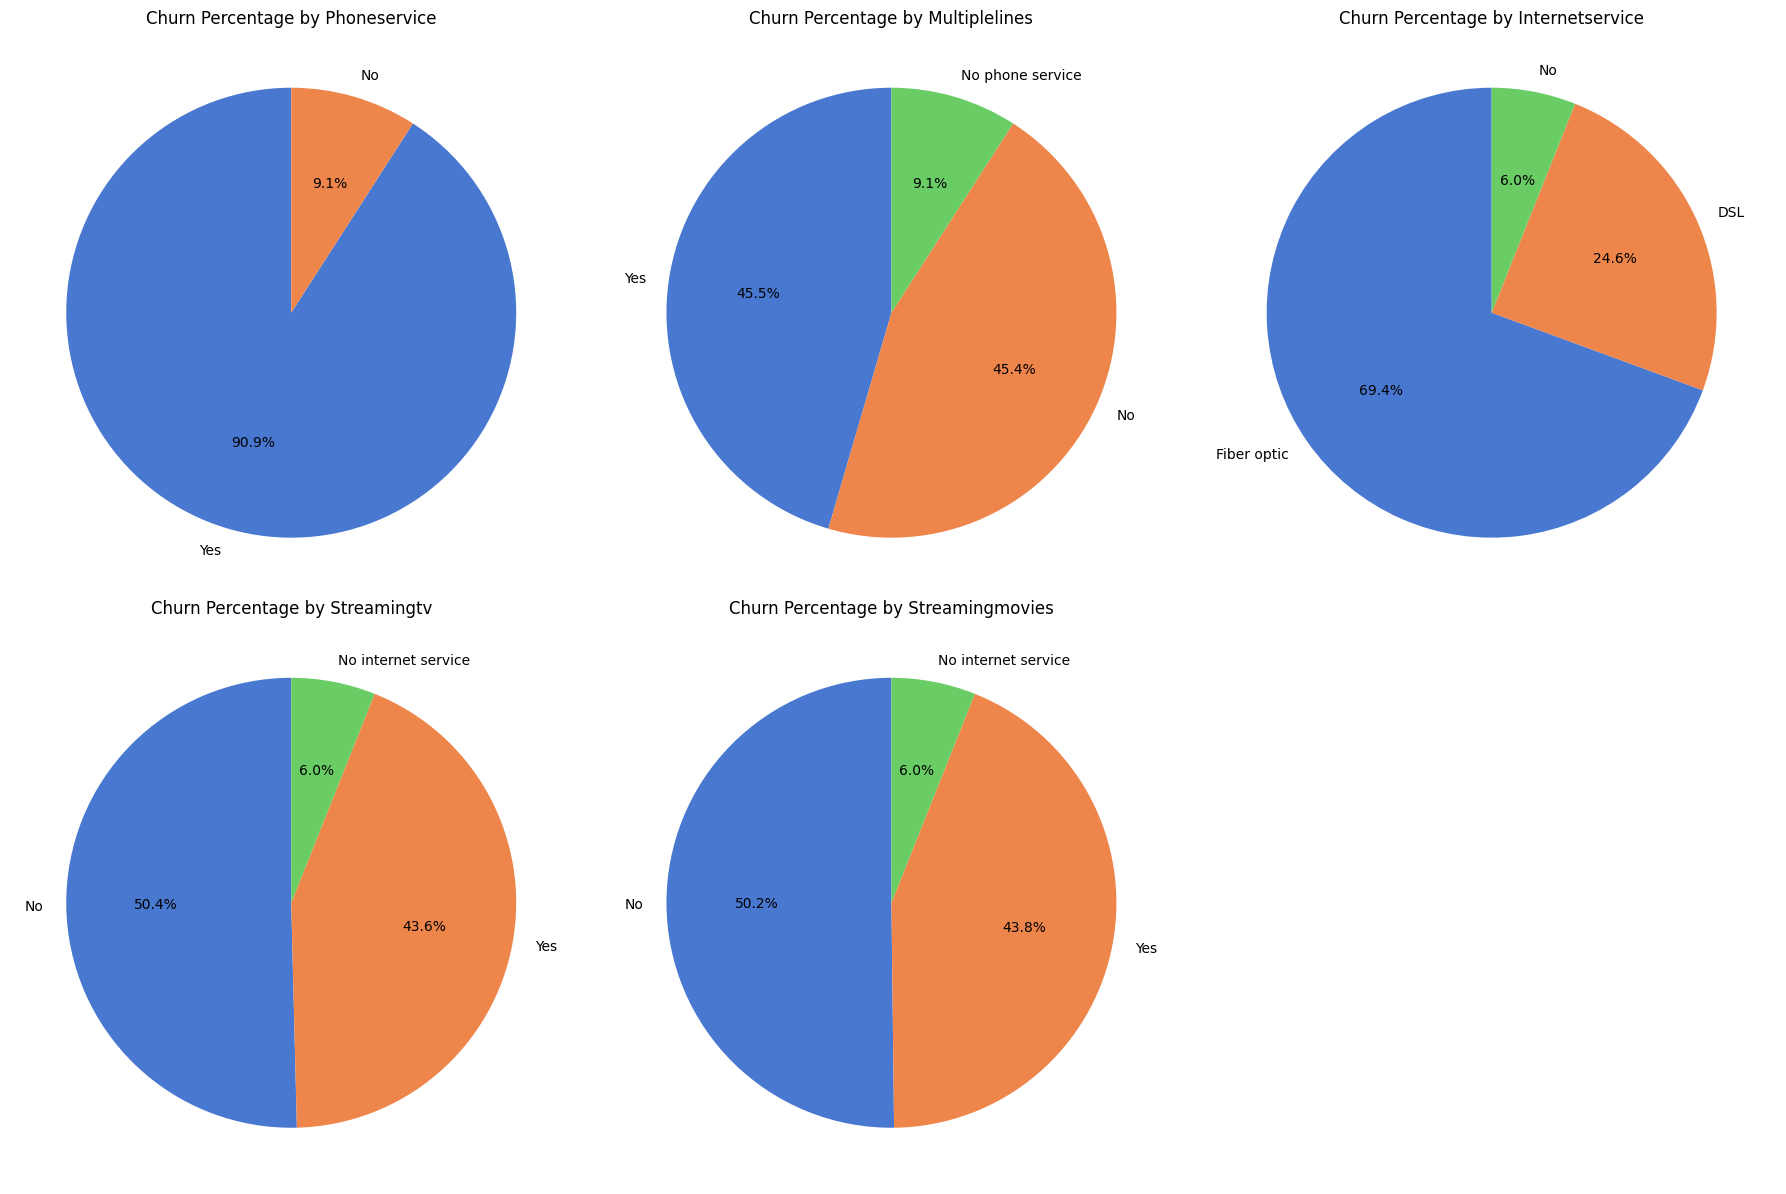

In [14]:
# Create a 2x3 grid for pie charts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Generate pie charts for each variable
for i, var in enumerate(variables2):
    ax = axes[i]
    churn_data = df_telco[df_telco['Churn'] == 'Yes'][var].value_counts(normalize=True) * 100
    non_churn_data = df_telco[df_telco['Churn'] == 'No'][var].value_counts(normalize=True) * 100

    # Combine churn and non-churn percentages
    combined_data = pd.concat(
        [churn_data.rename("Churn"), non_churn_data.rename("Non-Churn")],
        axis=1
    ).fillna(0)
    
    # Pie chart for churn percentages
    ax.pie(
        combined_data["Churn"],
        labels=combined_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("muted", len(combined_data.index))
    )
    ax.set_title(f'Churn Percentage by {var.replace("_", " ").capitalize()}')

# Hide the unused subplot (6th position)
if len(variables2) < len(axes):
    for j in range(len(variables2), len(axes)):
        axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


- **Phone Service** a high number (90%) of customers with a phone service have switched

- **Multiple Lines** Those that had multiples lines vs with a single line were pretty much identical

- **Internet Service** A majority of churned customers had Fiber optic compared to DSL

- **Streaming TV and Movies** Customers without a streaming TV and Movies service tend to switch services more than those that do have those services. The difference, however, is not very significant. 

##### 3.2.3 - Services Subscribed to - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

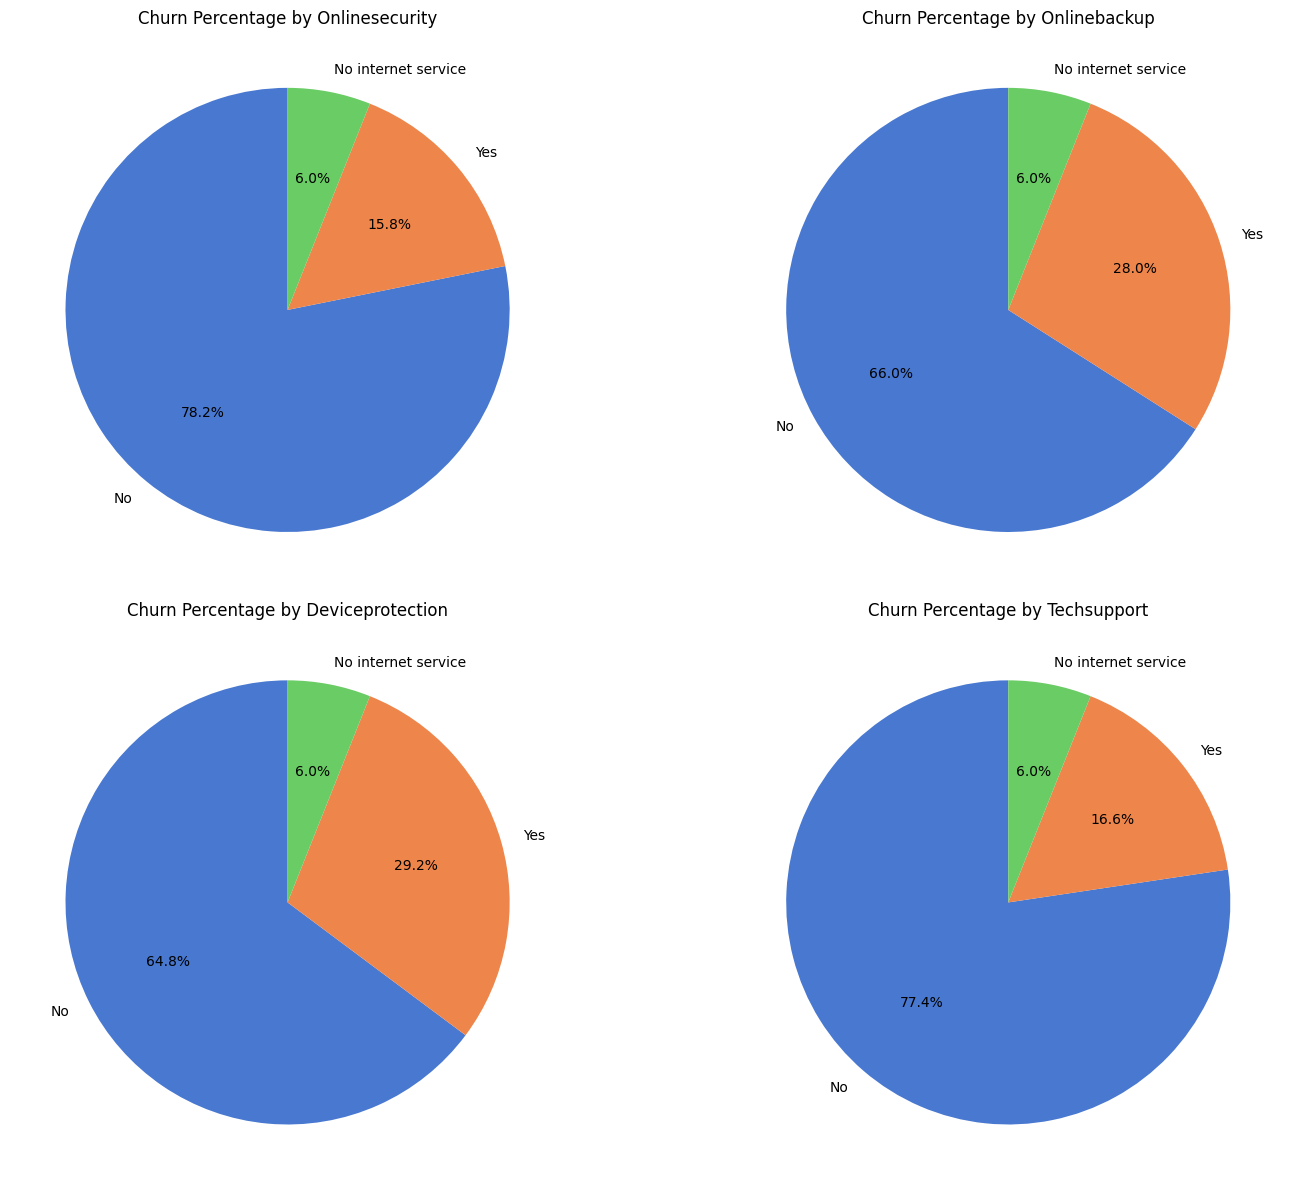

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Generate pie charts for each variable
for i, var in enumerate(variables3):
    ax = axes[i]
    churn_data = df_telco[df_telco['Churn'] == 'Yes'][var].value_counts(normalize=True) * 100
    non_churn_data = df_telco[df_telco['Churn'] == 'No'][var].value_counts(normalize=True) * 100

    # Combine churn and non-churn percentages
    combined_data = pd.concat(
        [churn_data.rename("Churn"), non_churn_data.rename("Non-Churn")],
        axis=1
    ).fillna(0)
    
    # Pie chart for churn percentages
    ax.pie(
        combined_data["Churn"],
        labels=combined_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("muted", len(combined_data.index))
    )
    ax.set_title(f'Churn Percentage by {var.replace("_", " ").capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

- All of these are similar to our bar plots showing significantly more customers switched services that did not subscribe to these services.

##### 3.2.4 - Finances - Contract , Paperless Billing, Payment Method

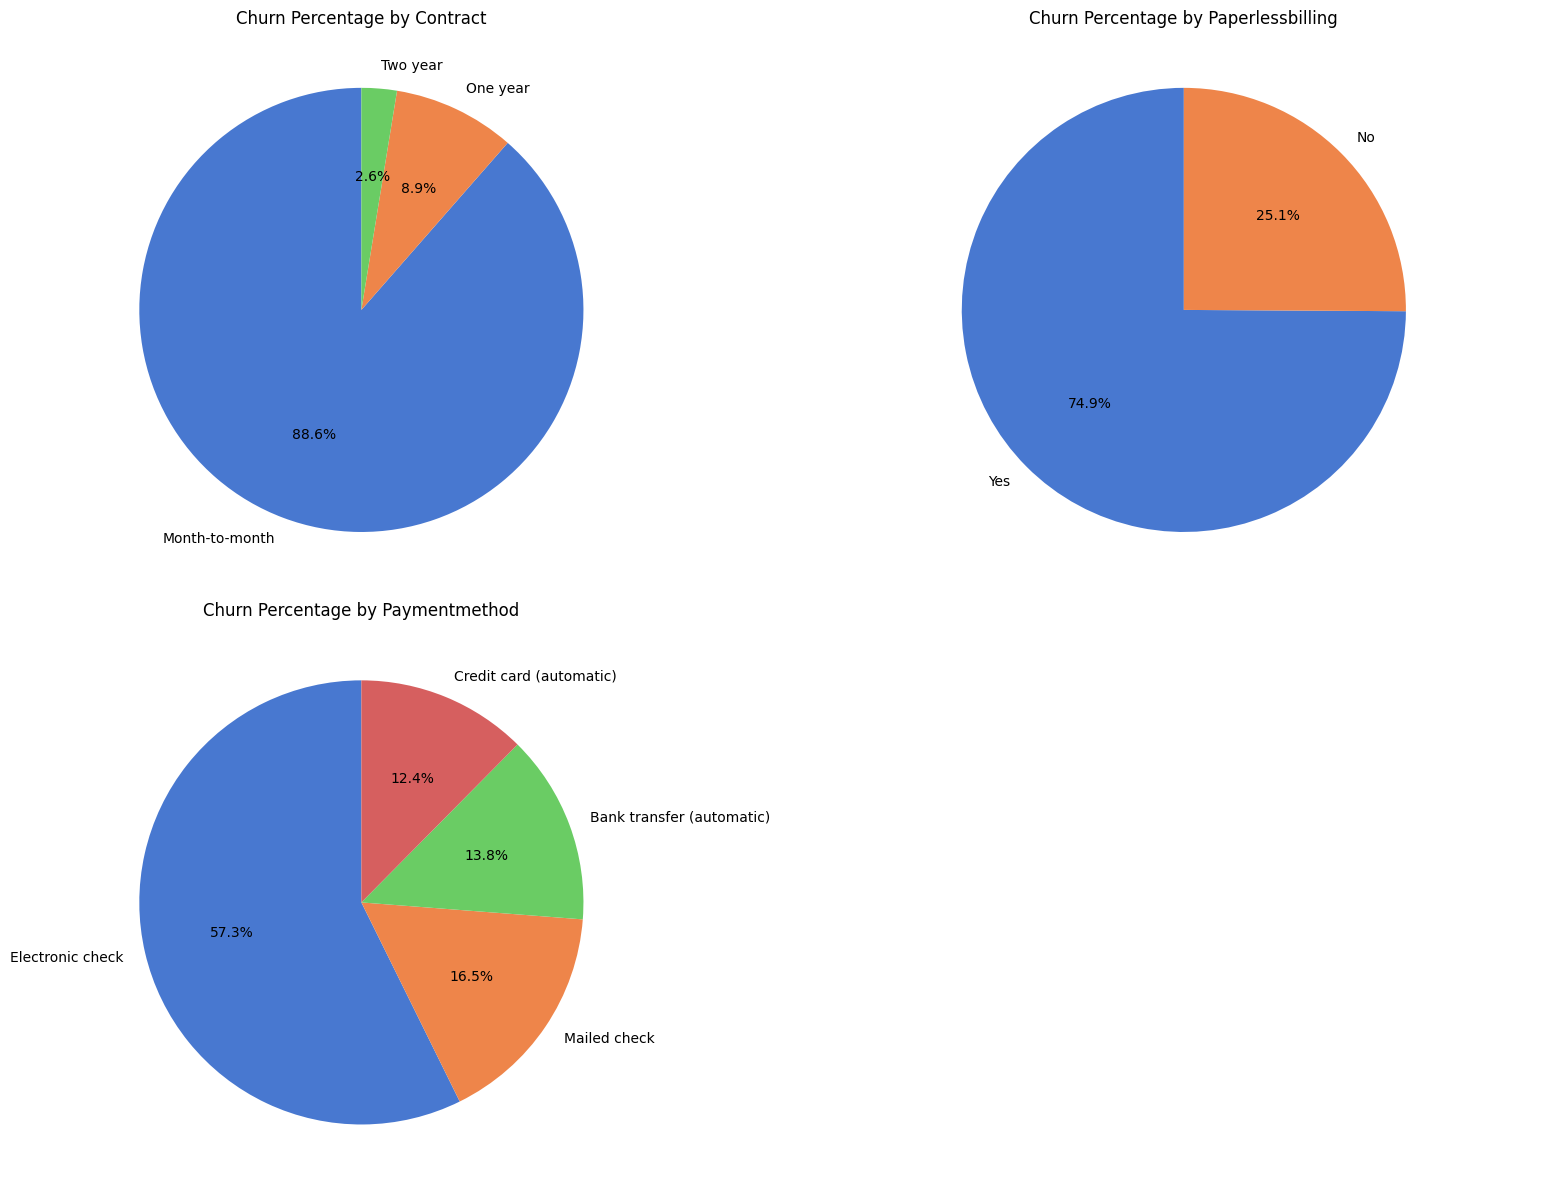

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Generate pie charts for each variable
for i, var in enumerate(variables4):
    ax = axes[i]
    churn_data = df_telco[df_telco['Churn'] == 'Yes'][var].value_counts(normalize=True) * 100
    non_churn_data = df_telco[df_telco['Churn'] == 'No'][var].value_counts(normalize=True) * 100

    # Combine churn and non-churn percentages
    combined_data = pd.concat(
        [churn_data.rename("Churn"), non_churn_data.rename("Non-Churn")],
        axis=1
    ).fillna(0)

    # Pie chart for churn percentages
    ax.pie(
        combined_data["Churn"],
        labels=combined_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("muted", len(combined_data.index))
    )
    ax.set_title(f'Churn Percentage by {var.replace("_", " ").capitalize()}')

# Turn off the unused subplot
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

- Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers

- PaperlessBilling does not seemed to be appreciated by the customers

- Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)

### 3.3 - Visualizing the Distribution of our Numerical Features

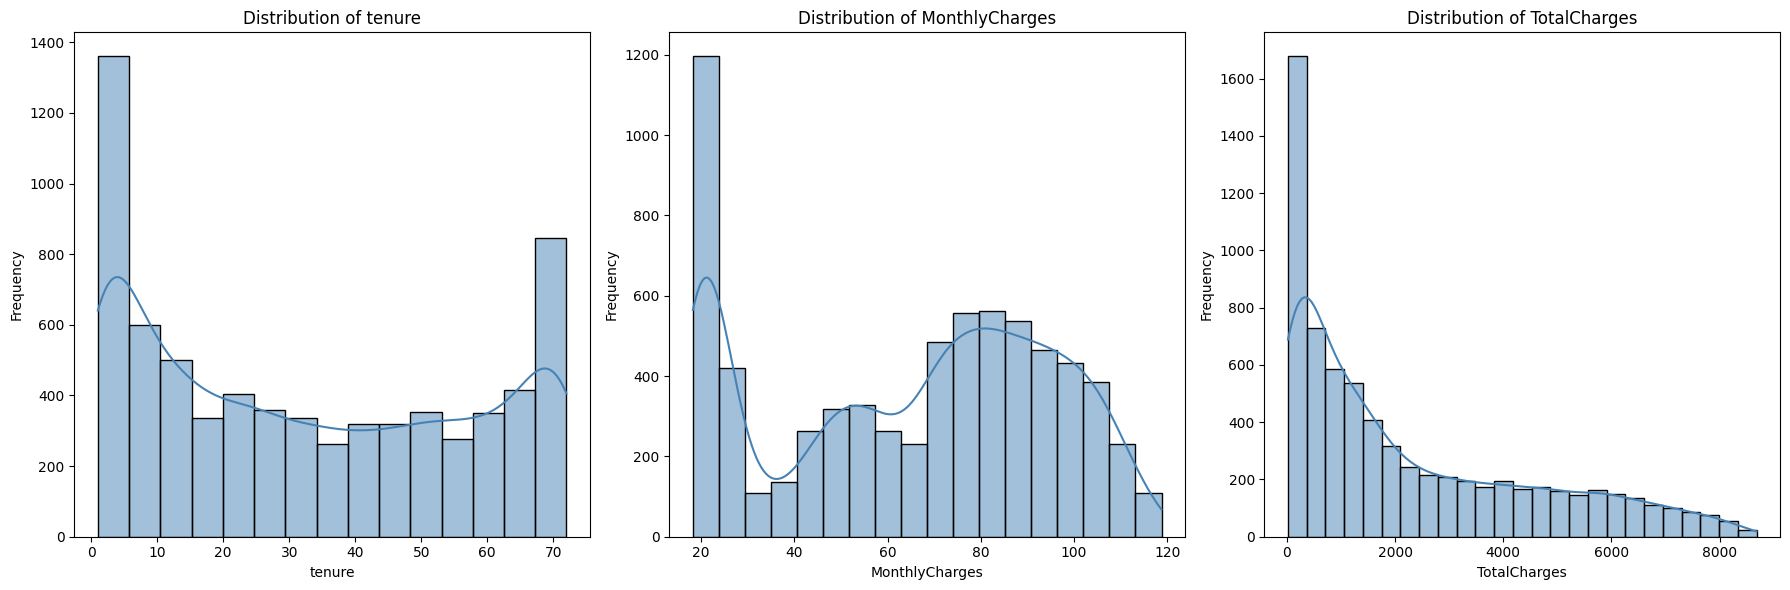

In [17]:
# Make a copy of the original data for plotting
df_telco_plot = df_telco.copy()
df_telco_plot['TotalCharges'] = pd.to_numeric(df_telco_plot['TotalCharges'], errors='coerce')
df_telco_plot = df_telco_plot.dropna(subset=['TotalCharges'])

# Define the variables to visualize
variables_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a 1x3 grid for the distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables_num):
    sns.histplot(
        data=df_telco_plot, 
        x=var, 
        kde=True, 
        color='steelblue', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


##### 3.3.2 - Distribution of customers who churned

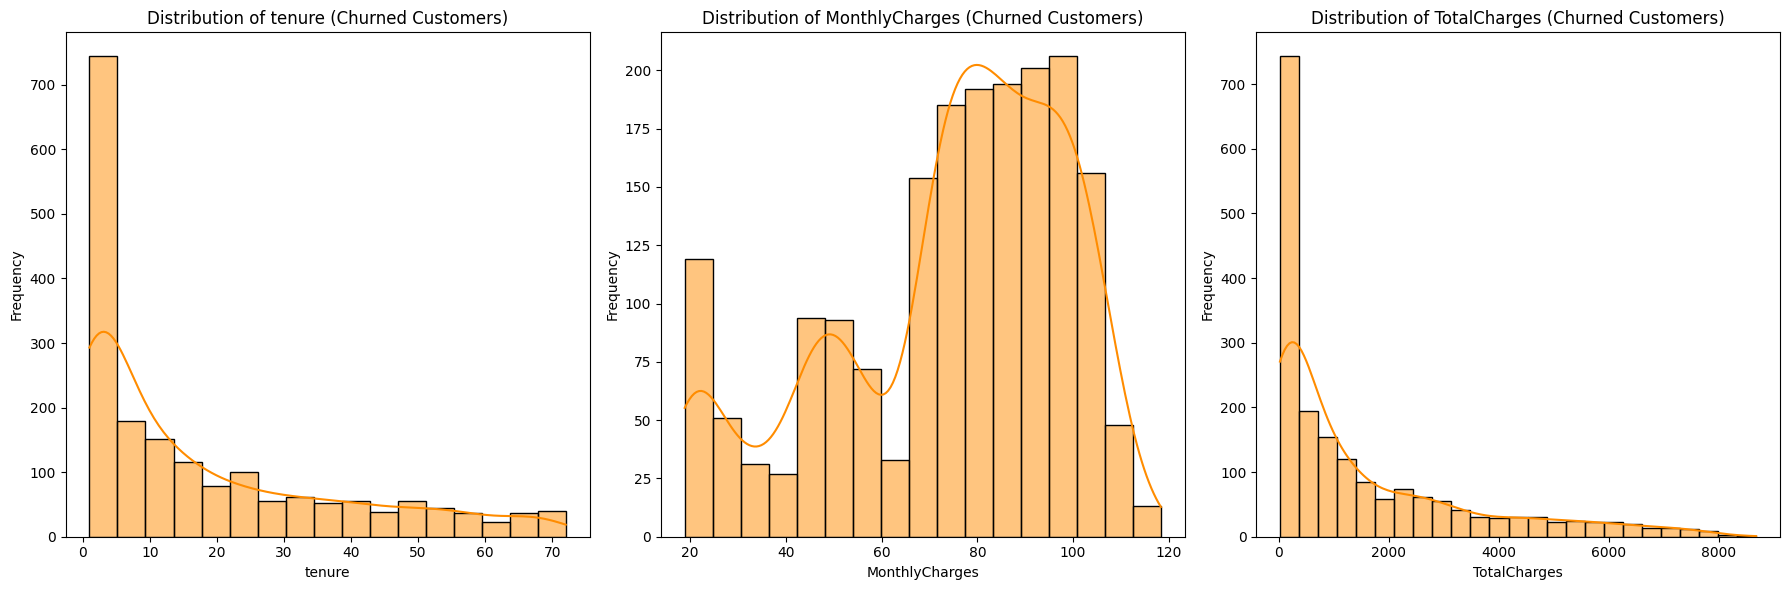

In [18]:
# Filter churned customers in the copied dataset
df_churned = df_telco_plot[df_telco_plot['Churn'] == 'Yes']

# Define the variables to visualize
variables_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a 1x3 grid for the distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables_num):
    sns.histplot(
        data=df_churned, 
        x=var, 
        kde=True, 
        color='darkorange', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {var} (Churned Customers)')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In the above we can see that recent customers are much more likely to churn than those that have been with telco for a while. This can likely easily be explained by customers that enjoy the service at the beginning, stay with the service provider for the long term. 

Monthly charges for customers that switched providers peaked around $70-$110 a month. 

Total charges can also be explained by newer customers leaving will likely have less total charges than those that stayed a while.  

### 3.4 - Summary of Exploratory Data Analysis by customer churn

##### Categorical Features
- **Gender:** Male and Female were almost identical 

- **Senior Citizen:** Non-Senior Citizens churned more than senior citizens

- **Partner:** No Partner > Partner

- **Dependents:** No Dependents > Dependents. This also showed us those that lived alone typically churned at a higher rate

- **Phone Service:** Phone Services > No Phone service 

- **Multiple Lines:** Multiple Lines > Single Line > No Phone Service 

- **Internet Service:** Fiber Optic > DSL > No Internet service 

- **Online Security:** No Online Security > Online Security 

- **Online Backup:** Absent > Present

- **Device Protection:** Absent > Present

- **Tech Support:** Absent > Present 

- **Streaming TV and Movies** Absent > Present 

- **Contracts:** Month-to-month > One Year > Two Year

- **Paperless Billing** Present > Absent 

- **Payment Method:** Electronic Check > Mailed Check > Automatic Bank Transfer > Credit Card 

##### Numerical Features

- **Tenure:** New customers typically switch providers at the highest rate 

- **Monthly Charges:** Customers with monthly charges between $70-$110 churn the most 

- **Total Charges:** Less total charges, typically around $0-$1000, showing us that customers with less tenures churn the most

### 4.0 Feature Engineering and Data Preprocessing

### 4.1 Handling Missing Values

In [19]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It appears total charges is an object variable so first we will update this before encoding the rest of our categorical variables. 

In [20]:
# Convert TotalCharges to float, coercing errors to NaN
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
print("Number of NaN values in TotalCharges after conversion:", df_telco['TotalCharges'].isna().sum())

Number of NaN values in TotalCharges after conversion: 11


As we saw earlier, the only missing value we will need to handle is for total charges. There are plenty of options on how to handle missing values. The first is to drop the rows that have missing values. This is typically a good option if you have a lot of data and the missing values are minimal, not making a big impact on the data. 

Another option is by imputation. This can be with the mean, median, or mode - depending on your data, data types, and distributions. 

In this case, only 11 missing values will have a pretty minimal impact. Given our data and understanding its variables from our EDA, there is something else we should consider. Since originally these values were not missing and only showed as missing once we converted it to numerical, maybe they were null for a reason. If the customers tenure = 0, then maybe total charges is also 0 and was not a mistake. 

In [21]:
df_telco.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# Inspect rows with missing TotalCharges
missing_rows = df_telco[df_telco['TotalCharges'].isna()]
print(missing_rows)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

As we can see, each of the customers whose total charges are missing also have a tenure of 0, meaning they have not made any payments yet. To go about this, we will impute each of these missing values as 0. 

In [23]:
# Impute missing values in TotalCharges with median
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(0)

# Confirm no more missing values
print("Missing Values of TotalCharges:", df_telco['TotalCharges'].isna().sum())

Missing Values of TotalCharges: 0


As we can see now, all missing values have been handled. 

### 4.2 Feature Engineering

##### 4.2.1- Encoding Categorical Variables

In [24]:
print("Original Dataset shape:", df_telco.shape)
df_telco.info()

Original Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

In [25]:
# Drop customerID column
df_encoded = df_telco.drop(columns=['customerID'])

# One-hot encode gender
df_encoded = pd.get_dummies(df_encoded, columns=['gender'], prefix='Gender')

# Label encode binary columns
binary_columns = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace 'Yes' with 1, 'No' and 'No internet service'/'No phone service' with 0
for col in binary_columns:
    df_encoded[col] = df_encoded[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# One-hot encode multi-class categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False)

# Convert boolean columns to integers (True = 1, False = 0)
bool_columns = df_encoded.select_dtypes(include='bool').columns

# Convert all boolean columns to integer (True = 1, False = 0)
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# Check the updated dataset
print("Updated Dataset with Encoding and Boolean Values as Integers:")
df_encoded.info()


Updated Dataset with Encoding and Boolean Values as Integers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null  

In [26]:
df_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


### 4.3 - Correlation Matrix

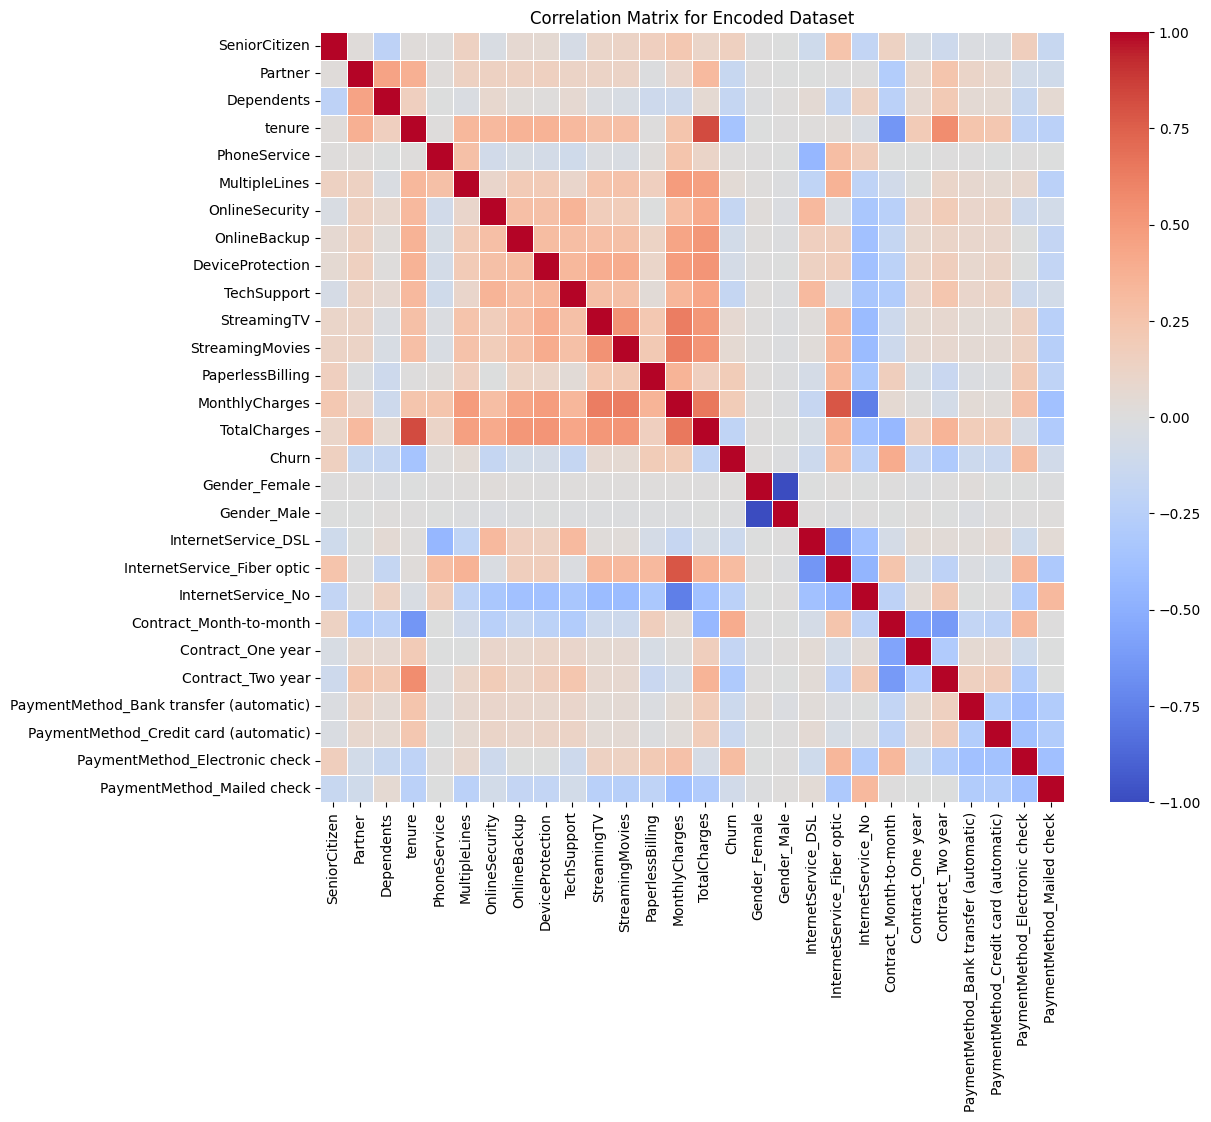

In [27]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Encoded Dataset')
plt.show()

Now lets look at Correlation just with our Target variable. 

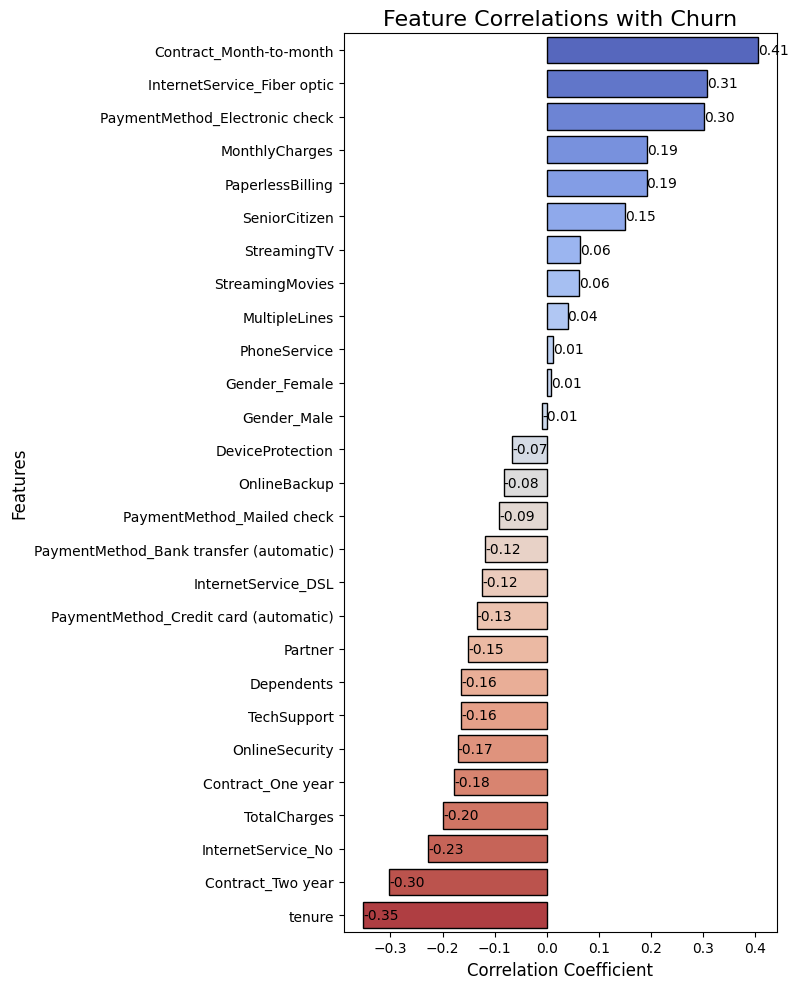

In [28]:
# Calculate the correlation of each feature with 'Churn'
correlations = df_encoded.corr()['Churn'].drop('Churn').sort_values(ascending=False)

# Create a DataFrame for better labeling
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot the correlations as a horizontal bar chart
plt.figure(figsize=(8, 10))
sns.barplot(
    data=correlation_df,
    y='Feature',
    x='Correlation',
    palette='coolwarm',
    edgecolor='black'
)

# Annotate each bar with the correlation value
for index, row in correlation_df.iterrows():
    plt.text(
        row['Correlation'],  
        index,               
        f"{row['Correlation']:.2f}",   
        color='black',
        va='center'
    )

# Add labels and title
plt.title('Feature Correlations with Churn', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


The above lists all of our correlation coefficients in regard to our target variable. 

### 5.0 Model Building

### 5.1 Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn'])  # Features
y = df_encoded['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.2 - Baseline Models - Pre standardization, Class Imbalance, Feature Selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')  
}


In [31]:
# Initialize a list to store results
results_list = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Collect metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Append the results
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall'],
        'F1-Score': classification_rep['weighted avg']['f1-score']
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
results_df.sort_values(by='Accuracy', ascending=False, inplace=True) 
print(results_df)

                 Model  Accuracy   ROC AUC  Precision    Recall  F1-Score
0  Logistic Regression  0.819021  0.862470   0.812121  0.819021  0.813957
5              XGBoost  0.792051  0.842247   0.780438  0.792051  0.782778
1        Random Forest  0.789922  0.839497   0.777623  0.789922  0.779884
3                  KNN  0.777147  0.774108   0.766034  0.777147  0.769512
4          Naive Bayes  0.755855  0.850349   0.815305  0.755855  0.768956
2                  SVM  0.735273  0.814744   0.540627  0.735273  0.623103


### 5.3 - Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

# Standardize the training and testing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Evaluate each model with standardized data
results_scaled = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else 'N/A'
    report = classification_report(y_test, y_pred, output_dict=True)
    results_scaled.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'ROC-AUC': auc
    })

# Display results as a table
results_scaled_df = pd.DataFrame(results_scaled)
print(results_scaled_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.820440   0.814332  0.820440  0.816203  0.862128
1        Random Forest  0.789922   0.777122  0.789922  0.779060  0.842416
2                  SVM  0.814053   0.805118  0.814053  0.806341  0.826849
3                  KNN  0.772179   0.765798  0.772179  0.768464  0.797807
4          Naive Bayes  0.755145   0.814996  0.755145  0.768310  0.849986
5              XGBoost  0.792051   0.780438  0.792051  0.782778  0.842247


### 5.4 - Feature Selection

In the next few subsections, I will use a few different feature selection techniques to select potential features for our models. From there, we will cross validate and see how many times certain variables are selected before building our models with our selected features. Selecting features can be important because it allows us to identify and utilize only the most relevant features from a dataset, which significantly improves the performance of a machine learning model by reducing overfitting, enhancing interpretability, and speeding up training time. 

##### 5.4.1 - Correlation and Multicollinearity

Correlation can be a solid method for feature selection since it allows us to identify features with strong relationships to our target variable, allow you to look for multicollinearity and therefore reduce dimensionality when removing highly correlated features, and it is relatively simple to understand. 

In [34]:
# Calculate correlation coefficients of features with 'Churn'
correlations = df_encoded.corr()['Churn'].drop('Churn').sort_values(ascending=False)

# Create a DataFrame for display
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Display all correlations
print(correlation_df)

                                    Feature  Correlation
0                   Contract_Month-to-month     0.405103
1               InternetService_Fiber optic     0.308020
2            PaymentMethod_Electronic check     0.301919
3                            MonthlyCharges     0.193356
4                          PaperlessBilling     0.191825
5                             SeniorCitizen     0.150889
6                               StreamingTV     0.063228
7                           StreamingMovies     0.061382
8                             MultipleLines     0.040102
9                              PhoneService     0.011942
10                            Gender_Female     0.008612
11                              Gender_Male    -0.008612
12                         DeviceProtection    -0.066160
13                             OnlineBackup    -0.082255
14               PaymentMethod_Mailed check    -0.091683
15  PaymentMethod_Bank transfer (automatic)    -0.117937
16                      Interne

In [35]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display VIF values
vif_data.sort_values(by="VIF", ascending=False, inplace=True)
print(vif_data)

                                    Feature         VIF
26               PaymentMethod_Mailed check         inf
15                            Gender_Female         inf
25           PaymentMethod_Electronic check         inf
24    PaymentMethod_Credit card (automatic)         inf
23  PaymentMethod_Bank transfer (automatic)         inf
22                        Contract_Two year         inf
21                        Contract_One year         inf
20                  Contract_Month-to-month         inf
19                       InternetService_No         inf
18              InternetService_Fiber optic         inf
17                      InternetService_DSL         inf
16                              Gender_Male         inf
13                           MonthlyCharges  874.575399
4                              PhoneService   35.582490
10                              StreamingTV   24.459954
11                          StreamingMovies   24.375149
14                             TotalCharges   10

Below, we want to find a balance of selecting important and highly correlated variables and not selecting variables with high multicollinearity. Features listed above with 'inf' clearly indicate redundancy given they were created with one-hot encoding and all came from the same variable. Additionally, other variables that have a VIF value above 10 indicate high multicollinearity. 

In order to properly handle this, we will only take one variable from any of our one-hot encoded variables and select the highest correlated features. 

##### 5.4.2 - Tree Based Feature Importance

Our next method for observing relevant features is by using tree methods, in this case, Random Forest. This is another good option since it can capture non-linear relationships, are robust to multicollinearity, and evaluate the importance of each of these features. Below we will show the range of scores for each of these features, ranging from 0 to 1 where each score tells us how much that feature contributes to the overall importance. 

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances.head(20))

                           Feature  Importance
14                    TotalCharges    0.182973
13                  MonthlyCharges    0.170337
3                           tenure    0.154517
20         Contract_Month-to-month    0.064456
18     InternetService_Fiber optic    0.033282
25  PaymentMethod_Electronic check    0.031776
12                PaperlessBilling    0.025664
22               Contract_Two year    0.025631
1                          Partner    0.023895
6                   OnlineSecurity    0.021915
7                     OnlineBackup    0.020725
0                    SeniorCitizen    0.020170
5                    MultipleLines    0.019850
9                      TechSupport    0.019390
2                       Dependents    0.018828
11                 StreamingMovies    0.018460
8                 DeviceProtection    0.018013
15                   Gender_Female    0.017205
16                     Gender_Male    0.017079
10                     StreamingTV    0.016204


##### 5.4.3 - Mutual Information

Mutual information is a good method for feature selection because it can measure the degree of dependence between features and the target variable, regardless of whether the relationship is linear or non-linear, making it suitable for identifying relevant features even when complex relationships exist within the data

In [49]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, discrete_features='auto')
mutual_info_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Info': mutual_info})
mutual_info_df.sort_values(by='Mutual Info', ascending=False, inplace=True)
print(mutual_info_df.head(20))

                                    Feature  Mutual Info
20                  Contract_Month-to-month     0.095116
3                                    tenure     0.070849
22                        Contract_Two year     0.057715
18              InternetService_Fiber optic     0.055543
13                           MonthlyCharges     0.048361
14                             TotalCharges     0.043071
25           PaymentMethod_Electronic check     0.042223
19                       InternetService_No     0.031796
21                        Contract_One year     0.028358
6                            OnlineSecurity     0.019925
2                                Dependents     0.015489
24    PaymentMethod_Credit card (automatic)     0.012679
12                         PaperlessBilling     0.011971
9                               TechSupport     0.011236
23  PaymentMethod_Bank transfer (automatic)     0.008302
0                             SeniorCitizen     0.007755
16                             

##### 5.4.4 - Lasso Selection

Lasso selection is a good method for feature selection because it automatically identifies and removes irrelevant features by shrinking their coefficients to zero through its L1 penalty, effectively performing feature selection while also regularizing the model.

In [52]:
from sklearn.linear_model import LogisticRegressionCV

# Use Logistic Regression with L1 regularization
lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train_scaled, y_train)

lasso_features = X_train.columns[np.abs(lasso.coef_).flatten() > 0]
print("Lasso Selected Features:", lasso_features)

Lasso Selected Features: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Gender_Female', 'Gender_Male',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


##### 5.4.5 - Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a good method for feature selection because it iteratively removes the least important features from a dataset, allowing you to identify the most relevant features for your model, leading to improved model performance, reduced overfitting, and increased interpretability.

In [53]:
from sklearn.feature_selection import RFE

# Apply RFE
logreg = LogisticRegression(random_state=42, max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Adjust number of features
rfe.fit(X_train_scaled, y_train)

selected_features_rfe = X_train.columns[rfe.support_]
print("Selected Features:", selected_features_rfe)

Selected Features: Index(['tenure', 'MultipleLines', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_Two year'],
      dtype='object')


##### 5.4.6 - Selecting Features

The below we set some parameters to count the amount of times certain variables are selected. These were select from observing the printed values in each section and trying to select the best variables. 

In [57]:
# Create a dictionary to store the counts
feature_counts = {feature: 0 for feature in X_train.columns}

# Update counts for each selection method
# Correlation with a coefficient > (+/-) 0.1
correlation_selected = correlation_df.loc[correlation_df['Correlation'].abs() > 0.1, 'Feature']
for feature in correlation_selected:
    feature_counts[feature] += 1

# Mutual Information above 0.01
mutual_info_selected = mutual_info_df.loc[mutual_info_df['Mutual Info'] > 0.01, 'Feature']
for feature in mutual_info_selected:
    feature_counts[feature] += 1

# Tree-Based Importance above 0.02
tree_based_selected = feature_importances.loc[feature_importances['Importance'] > 0.02, 'Feature']
for feature in tree_based_selected:
    feature_counts[feature] += 1

# Lasso
for feature in lasso_features:
    feature_counts[feature] += 1

# RFE
for feature in selected_features_rfe:
    feature_counts[feature] += 1

# Convert counts to a DataFrame for display
feature_summary = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Count'])
feature_summary = feature_summary.sort_values(by='Count', ascending=False)

# Display the feature selection counts
print(feature_summary)


                                    Feature  Count
13                           MonthlyCharges      5
3                                    tenure      5
22                        Contract_Two year      5
20                  Contract_Month-to-month      5
18              InternetService_Fiber optic      5
14                             TotalCharges      5
25           PaymentMethod_Electronic check      4
6                            OnlineSecurity      4
19                       InternetService_No      4
12                         PaperlessBilling      4
1                                   Partner      3
24    PaymentMethod_Credit card (automatic)      3
21                        Contract_One year      3
0                             SeniorCitizen      3
9                               TechSupport      3
2                                Dependents      3
11                          StreamingMovies      2
17                      InternetService_DSL      2
10                             

After printing the amount of times each variable was selected, we we will only take variables that were selected >= 3 times. 

In [58]:
selected_features = ['MonthlyCharges', 'tenure', 'Contract_Two year',
                     'Contract_Month-to-month','InternetService_Fiber optic',
                     'TotalCharges', 'PaymentMethod_Electronic check', 
                     'OnlineSecurity', 'InternetService_No', 'PaperlessBilling',
                     'Partner', 'PaymentMethod_Credit card (automatic)', 'Contract_One year', 
                     'SeniorCitizen', 'TechSupport', 'Dependents', 
                     ]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

scaler_selected = StandardScaler()

X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

# Initialize the models
models_selected = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

# Train models and evaluate performance
results_selected_scaled = []

for name, model in models_selected.items():
    model.fit(X_train_selected_scaled, y_train)
    y_pred = model.predict(X_test_selected_scaled)
    y_pred_proba = model.predict_proba(X_test_selected_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    results_selected_scaled.append({
        'Model': name,
        'Accuracy': model.score(X_test_selected_scaled, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    })

# Convert results to a DataFrame
results_selected_scaled_df = pd.DataFrame(results_selected_scaled)

# Display the results
print(results_selected_scaled_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.813343   0.680921  0.554960  0.611521  0.862549
1        Random Forest  0.787793   0.628472  0.485255  0.547655  0.822968
2                  SVM  0.808375   0.687273  0.506702  0.583333  0.823998
3                  KNN  0.781405   0.614035  0.469169  0.531915  0.796549
4          Naive Bayes  0.745209   0.511513  0.833780  0.634047  0.849338
5              XGBoost  0.799858   0.652174  0.522788  0.580357  0.841470


When comparing the performance to our baselines models, we can quickly see that Precision, Recall, F1-Score, and ROC-AUC dropped after selecting features. Our best performances came from our standardized models with all features available. 

### 5.5 - Handling Class Imbalance

Handling class imbalance can be an important step before implementing our models. When classes are significantly uneven, a machine learning model will often favor the majority class, leading to bias and poor performance on the minority class, resulting in inaccurate predictions overall. As we saw in our EDA phase, 73.5% of the customers are non-churn customers so we clearly see an imbalance. 

There are two common ways to go about this; oversampling and undersampling. Oversampling is the process of replicating data points from the minority class to create a more balanced distribution. Undersampling is the process of removing data points from the majority class to match the minority class size. Below, I will utilize SMOTE which generates synthetic data points that are similar to existing minority class data to increase their representation.

In [38]:
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

models_balanced = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')  
}

results_balanced = []
for model_name, model in models_balanced.items():
    model.fit(X_train_balanced, y_train_balanced) 
    y_pred = model.predict(X_test_scaled) 
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else 'N/A'
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Append results
    results_balanced.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'ROC-AUC': auc
    })

results_balanced_df = pd.DataFrame(results_balanced)
print("Results after handling class imbalance with SMOTE:")
print(results_balanced_df)


Results after handling class imbalance with SMOTE:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.755145   0.814996  0.755145  0.768310  0.860444
1        Random Forest  0.784244   0.784616  0.784244  0.784428  0.841665
2                  SVM  0.765082   0.801623  0.765082  0.775358  0.839971
3                  KNN  0.704045   0.773786  0.704045  0.720515  0.777494
4          Naive Bayes  0.743080   0.814442  0.743080  0.757557  0.849531
5              XGBoost  0.782115   0.781191  0.782115  0.781642  0.838692


As we can see here, performance dropped off in just about every category. Our best performance is still coming from our standardized models prior to feature selection.

### 5.6 - Best Models

Despite trying different feature selection methods and handling class imbalance, our best models overall were from all variables after scaling. 

Below, we will plot the ROC curves and confusion matrices of these models. The ROC curve shows us how well a model performs by plotting the true positive rate (TPR) against the false positive rate (FPR). The closer the curve is to the top left corner of the graph, the more accurate the test. The closer the curve is to the diagonal line, the less accurate the test.

Below that, the confusion matrices show us

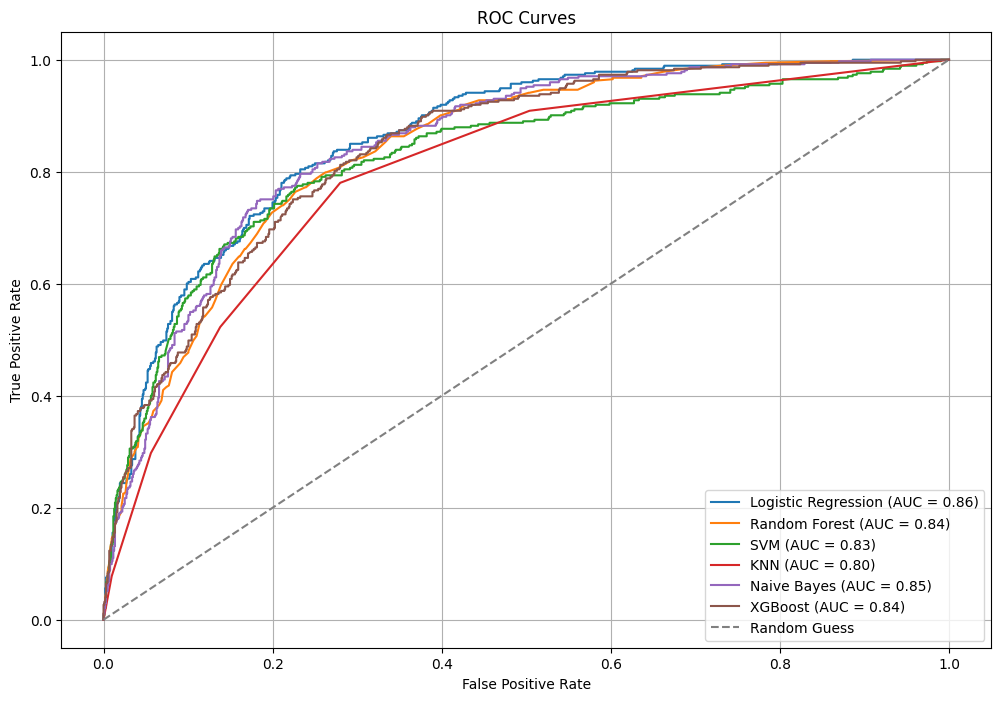

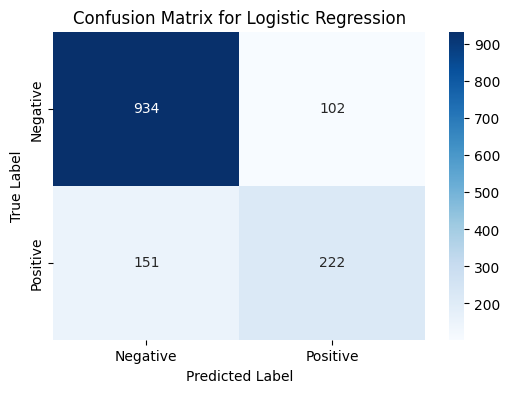

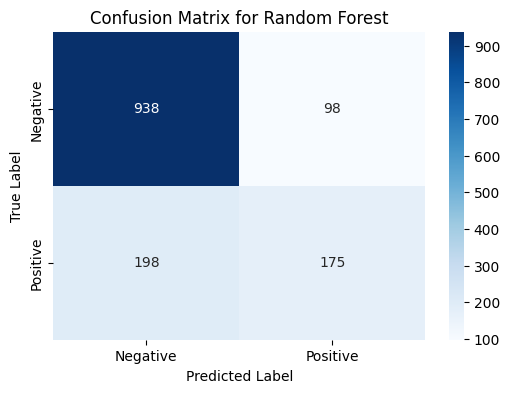

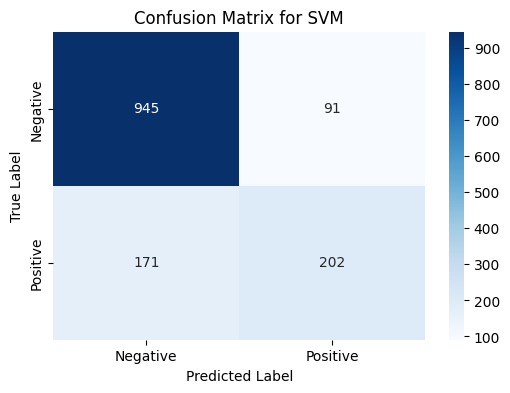

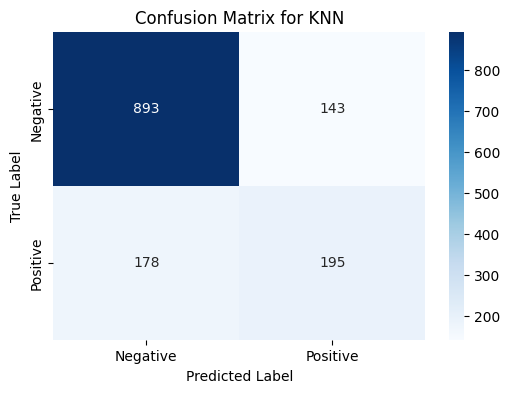

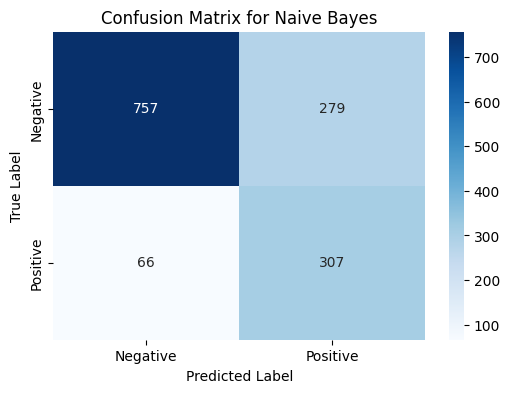

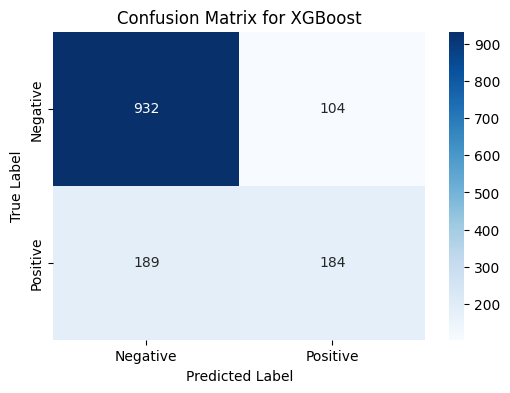

In [61]:
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, classification_report

# Plot ROC curves
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc_score = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrices
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()